**ANALISIS DATA GRUP Masih_Pemula**

# Data Preprocessing

In [ ]:
# Import library yang diperlukan
import pandas as pd

# Load file Excel dengan multiple sheet
file_path = '/content/sales.xlsx'
excel_data = pd.ExcelFile(file_path)

# Membaca setiap sheet ke dalam DataFrame terpisah
sales_data = excel_data.parse('SalesData')
product_data = excel_data.parse('Product')
customer_data = excel_data.parse('Customer')
sales_rep_data = excel_data.parse('SalesRep')

# Tampilkan beberapa data dari setiap sheet untuk verifikasi
print("Sales Data:")
print(sales_data.head())

print("\nProduct Data:")
print(product_data.head())

print("\nCustomer Data:")
print(customer_data.head())

print("\nSales Rep Data:")
print(sales_rep_data.head())


Sales Data:
   SalesID CustomerID SalesRepID ProductID  Sales Quantity (in tons)  \
0   210001       R012     BB1988     S2022                        16   
1   210002       R012     AA1986     S2022                        18   
2   210003       R078     CG1990     F3031                         4   
3   210004       R056     BF1988     F3030                         1   
4   210005       R078     CG1990     F3032                         8   

   Sales Amount (in US$)  Year Month  Day  
0                16000.0  2021   Jan    3  
1                18000.0  2021   Jan    3  
2                 4000.0  2021   Jan    4  
3                 1300.0  2021   Jan    6  
4                 5600.0  2021   Jan    6  

Product Data:
   No ProductID    Product Name Product Category
0   1     S2020            Corn             Seed
1   2     S2021        Soybeans             Seed
2   3     S2022           Wheat             Seed
3   4     F3030   Nitrogen-rich      Fertilizers
4   5     F3031  Potassium-rich

In [ ]:
# Menggabungkan data `sales_data` dengan `product_data` berdasarkan `Product ID`
sales_data = sales_data.merge(product_data, on='ProductID', how='left')

# Menggabungkan data `sales_data` dengan `customer_data` berdasarkan `Customer ID`
sales_data = sales_data.merge(customer_data, on='CustomerID', how='left')

# Menggabungkan data `sales_data` dengan `sales_rep_data` berdasarkan `SalesRep ID`
sales_data = sales_data.merge(sales_rep_data, on='SalesRepID', how='left')

# Menampilkan data yang sudah digabungkan untuk memastikan hasilnya benar
print("Combined Data:")
print(sales_data.head())


Combined Data:
   SalesID CustomerID SalesRepID ProductID  Sales Quantity (in tons)  \
0   210001       R012     BB1988     S2022                        16   
1   210002       R012     AA1986     S2022                        18   
2   210003       R078     CG1990     F3031                         4   
3   210004       R056     BF1988     F3030                         1   
4   210005       R078     CG1990     F3032                         8   

   Sales Amount (in US$)  Year Month  Day  No_x  ...    Size  Location  \
0                16000.0  2021   Jan    3     3  ...     Big      Iowa   
1                18000.0  2021   Jan    3     3  ...     Big      Iowa   
2                 4000.0  2021   Jan    4     5  ...  Medium  Nebraska   
3                 1300.0  2021   Jan    6     4  ...  Medium   Indiana   
4                 5600.0  2021   Jan    6     6  ...  Medium  Nebraska   

   Subsidized No_y Firstnames Surnames Tenure  Gender  \
0          No    2        Ben    Brown     11     

In [ ]:
# Membuat kamus untuk konversi bulan teks ke angka
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Mengonversi kolom `month` dari teks ke angka
sales_data['Month'] = sales_data['Month'].map(month_map)

# Membuat kolom `Date` dengan menggabungkan kolom `day`, `month`, dan `year`
sales_data['Date'] = pd.to_datetime(sales_data[['Year', 'Month', 'Day']])

# Menampilkan data untuk memastikan kolom `Date` sudah benar
print(sales_data[['Year', 'Month', 'Day', 'Date']].head())


   Year  Month  Day       Date
0  2021      1    3 2021-01-03
1  2021      1    3 2021-01-03
2  2021      1    4 2021-01-04
3  2021      1    6 2021-01-06
4  2021      1    6 2021-01-06


In [ ]:
# Menambahkan kolom `Year` dan `Month` dari kolom `Date`
sales_data['Year'] = pd.to_datetime(sales_data['Date']).dt.year
sales_data['Month'] = pd.to_datetime(sales_data['Date']).dt.month

# Tampilkan beberapa baris untuk memastikan kolom tambahan sudah benar
print(sales_data[['Date', 'Year', 'Month']].head())


        Date  Year  Month
0 2021-01-03  2021      1
1 2021-01-03  2021      1
2 2021-01-04  2021      1
3 2021-01-06  2021      1
4 2021-01-06  2021      1


# Bagian 1

Analisis Deskriptif

 Menghitung Total Penjualan Tahunan untuk Setiap Produk Selama Periode Tertentu

In [ ]:
# Menghitung total penjualan tahunan untuk setiap produk
total_sales_per_year = sales_data.groupby(['ProductID', 'Product Name', 'Year'])['Sales Amount (in US$)'].sum().reset_index()

# Menghitung total penjualan tahunan keseluruhan untuk mendapatkan persentase kontribusi per produk
yearly_total_sales = sales_data.groupby('Year')['Sales Amount (in US$)'].sum().reset_index()
yearly_total_sales = yearly_total_sales.rename(columns={'Sales Amount (in US$)': 'Total Sales Year'})

# Menggabungkan data total penjualan per produk dengan total penjualan tahunan
total_sales_per_year = total_sales_per_year.merge(yearly_total_sales, on='Year')
total_sales_per_year['Percentage Contribution'] = (total_sales_per_year['Sales Amount (in US$)'] / total_sales_per_year['Total Sales Year']) * 100

# Menampilkan hasil
print("Total Penjualan Tahunan dan Persentase Kontribusi untuk Setiap Produk (dengan Nama Produk):")
print(total_sales_per_year)



Total Penjualan Tahunan dan Persentase Kontribusi untuk Setiap Produk (dengan Nama Produk):
   ProductID    Product Name  Year  Sales Amount (in US$)  Total Sales Year  \
0      F3030   Nitrogen-rich  2021               998400.0         5977200.0   
1      F3030   Nitrogen-rich  2022               605800.0         4575600.0   
2      F3030   Nitrogen-rich  2023               981500.0         6289300.0   
3      F3031  Potassium-rich  2021               639000.0         5977200.0   
4      F3031  Potassium-rich  2022               725000.0         4575600.0   
5      F3031  Potassium-rich  2023               735000.0         6289300.0   
6      F3032  Phosporus-rich  2021               499800.0         5977200.0   
7      F3032  Phosporus-rich  2022               310800.0         4575600.0   
8      F3032  Phosporus-rich  2023               513800.0         6289300.0   
9      S2020            Corn  2021              1965000.0         5977200.0   
10     S2020            Corn  2022     

Menentukan Rata-Rata Penjualan per Pelanggan Berdasarkan Karakteristiknya

In [ ]:
# Menghitung total dan rata-rata penjualan per pelanggan berdasarkan Customer ID dan Customer Type
customer_sales_summary = sales_data.groupby(['CustomerID', 'CustomerType']).agg(
    Total_Sales=('Sales Amount (in US$)', 'sum'),
    Average_Sales=('Sales Amount (in US$)', 'mean'),
    Transaction_Count=('Sales Amount (in US$)', 'size')
).reset_index()

# Menghitung total keseluruhan penjualan untuk menghitung persentase kontribusi per pelanggan
total_sales_all_customers = customer_sales_summary['Total_Sales'].sum()
customer_sales_summary['Percentage_Contribution'] = (customer_sales_summary['Total_Sales'] / total_sales_all_customers) * 100

# Menghitung rata-rata penjualan per tipe pelanggan untuk perbandingan
avg_sales_by_customer_type = sales_data.groupby('CustomerType')['Sales Amount (in US$)'].mean().reset_index()
avg_sales_by_customer_type = avg_sales_by_customer_type.rename(columns={'Sales Amount (in US$)': 'Average_Sales_By_Type'})

# Menggabungkan rata-rata penjualan per tipe pelanggan ke dalam summary per pelanggan untuk perbandingan
customer_sales_summary = customer_sales_summary.merge(avg_sales_by_customer_type, on='CustomerType', how='left')

# Menampilkan hasil analisis yang lebih kompleks untuk rata-rata penjualan per pelanggan
print("Analisis Rata-Rata Penjualan per Pelanggan Berdasarkan Customer ID dan Customer Type:")
print(customer_sales_summary)



Analisis Rata-Rata Penjualan per Pelanggan Berdasarkan Customer ID dan Customer Type:
  CustomerID CustomerType  Total_Sales  Average_Sales  Transaction_Count  \
0       F034         Farm    6809300.0   26089.272031                261   
1       R012     Retailer    6072300.0   25196.265560                241   
2       R056     Retailer    2188300.0    8352.290076                262   
3       R078         Farm    1772200.0    7541.276596                235   

   Percentage_Contribution  Average_Sales_By_Type  
0                40.430231           17301.411290  
1                36.054293           16422.664016  
2                12.993035           16422.664016  
3                10.522441           17301.411290  


Mengidentifikasi 3 Perwakilan Penjualan Teratas Berdasarkan Total Penjualan

In [ ]:
# Membaca setiap sheet ke dalam DataFrame yang terpisah
sales_data = excel_data.parse('SalesData')
sales_rep_data = excel_data.parse('SalesRep')

# Menggabungkan data penjualan dengan data SalesRep berdasarkan SalesRep ID dengan suffixes untuk kolom duplikat
sales_data = sales_data.merge(sales_rep_data, on='SalesRepID', how='left', suffixes=('', '_rep'))

# Menghitung total penjualan per perwakilan penjualan berdasarkan SalesRep ID
total_sales_per_salesrep = sales_data.groupby(['SalesRepID', 'Firstnames', 'Surnames'])['Sales Amount (in US$)'].sum().reset_index()

# Menambahkan kolom nama lengkap dengan menggabungkan Firstnames dan Surnames
total_sales_per_salesrep['Full Name'] = total_sales_per_salesrep['Firstnames'] + ' ' + total_sales_per_salesrep['Surnames']

# Mengurutkan berdasarkan total penjualan dan memilih tiga perwakilan teratas
top_salesreps = total_sales_per_salesrep.sort_values(by='Sales Amount (in US$)', ascending=False).head(3)

# Menampilkan hasil tiga perwakilan penjualan teratas dengan nama lengkap dan informasi penjualan
print("Tiga Perwakilan Penjualan Teratas Berdasarkan Total Penjualan (dengan Nama Lengkap):")
print(top_salesreps[['SalesRepID', 'Full Name', 'Sales Amount (in US$)']])

Tiga Perwakilan Penjualan Teratas Berdasarkan Total Penjualan (dengan Nama Lengkap):
  SalesRepID   Full Name  Sales Amount (in US$)
3     BC1984  Cody Clark              3585400.0
0     AA1986  Alex Adams              3522300.0
6     DD1988  Drew Davis              3223900.0


Visualisasi Data:


Total penjualan untuk setiap produk yang disegmentasi berdasarkan jenis pelanggan

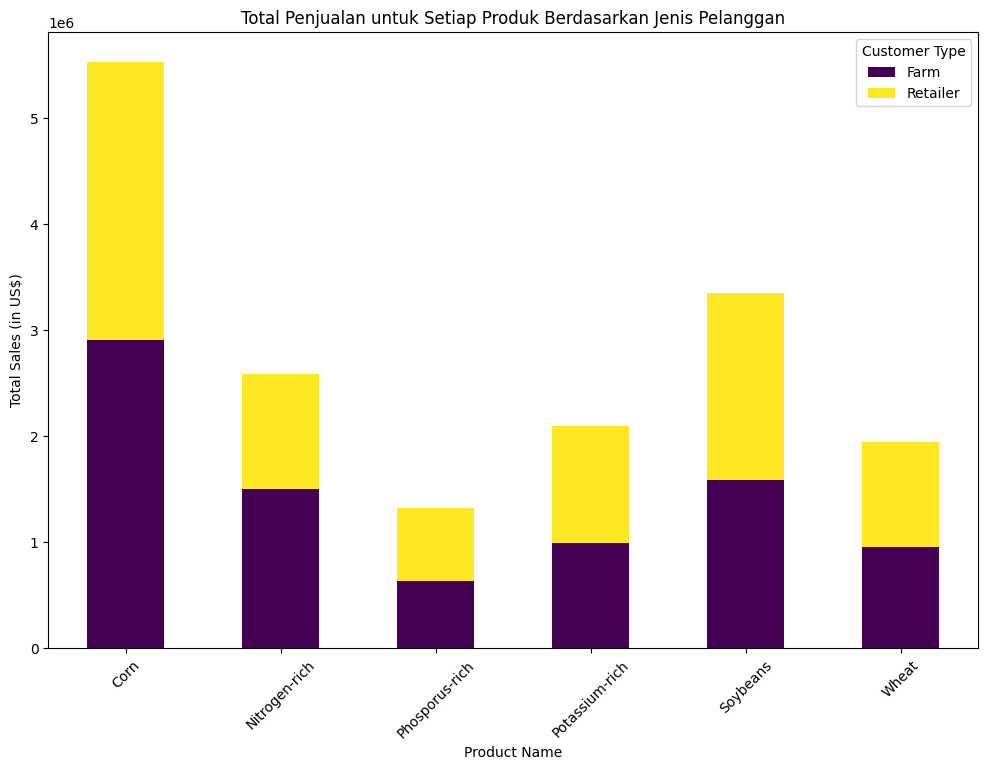

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data yang relevan dari SalesData, Product, dan Customer
sales_data = sales_data.merge(product_data[['ProductID', 'Product Name']], on='ProductID', how='left')
sales_data = sales_data.merge(customer_data[['CustomerID', 'CustomerType']], on='CustomerID', how='left')

# Menghitung total penjualan per produk, disegmentasi berdasarkan jenis pelanggan
product_sales_by_customer_type = sales_data.groupby(['Product Name', 'CustomerType'])['Sales Amount (in US$)'].sum().unstack()

# Visualisasi menggunakan bar plot
plt.figure(figsize=(12, 8))
product_sales_by_customer_type.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Total Penjualan untuk Setiap Produk Berdasarkan Jenis Pelanggan")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (in US$)")
plt.legend(title="Customer Type")
plt.xticks(rotation=45)
plt.show()


Visualisasi Proporsi Total Penjualan Menurut Jenis Pelanggan untuk Setiap Bulan dalam Setahun

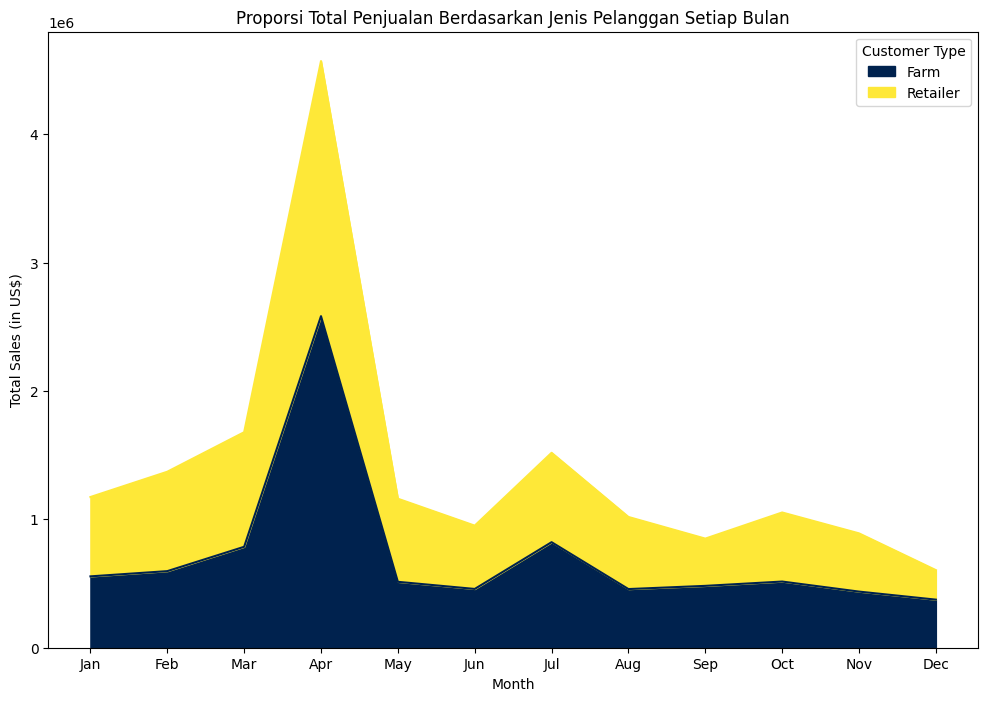

In [ ]:
# Menambahkan kolom 'Month' dari kolom 'Date' jika belum ada
sales_data['Month'] = pd.to_datetime(sales_data[['Year', 'Month', 'Day']]).dt.month

# Menghitung total penjualan bulanan berdasarkan jenis pelanggan
monthly_sales_by_customer_type = sales_data.groupby(['Month', 'CustomerType'])['Sales Amount (in US$)'].sum().unstack()

# Visualisasi menggunakan area plot untuk menunjukkan proporsi
plt.figure(figsize=(12, 8))
monthly_sales_by_customer_type.plot(kind='area', stacked=True, colormap='cividis', ax=plt.gca())
plt.title("Proporsi Total Penjualan Berdasarkan Jenis Pelanggan Setiap Bulan")
plt.xlabel("Month")
plt.ylabel("Total Sales (in US$)")
plt.legend(title="Customer Type")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Visualisasi Kinerja Penjualan dari Tiga Perwakilan Penjualan Teratas Selama Periode Pelaporan Tiga Tahun

Ringkasan Perubahan Signifikan pada Kinerja Penjualan (Tiga Perwakilan Teratas):

Perwakilan: Cody Clark
Tahun: 2022, Total Penjualan: $986,600.00, Perubahan: -29.24% (Penurunan)


Perwakilan: Alex Adams
Tahun: 2022, Total Penjualan: $877,300.00, Perubahan: -33.88% (Penurunan)
Tahun: 2023, Total Penjualan: $1,318,200.00, Perubahan: 50.26% (Peningkatan)


Perwakilan: Drew Davis
Tahun: 2023, Total Penjualan: $1,340,700.00, Perubahan: 59.00% (Peningkatan)




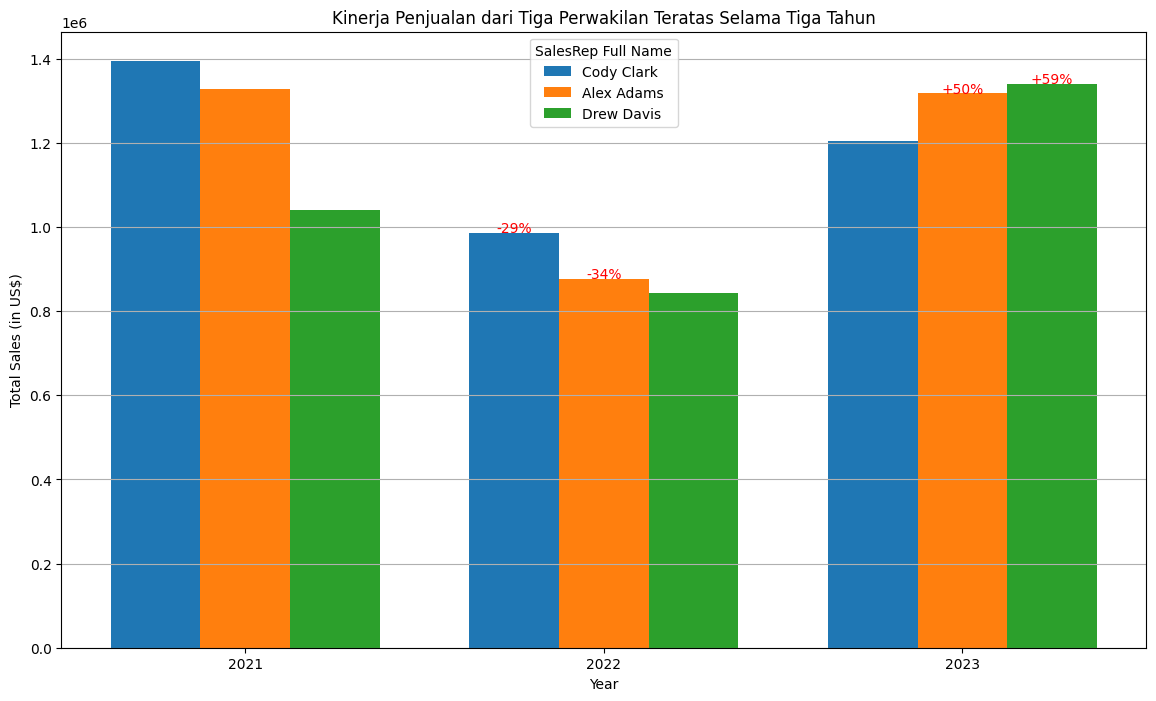

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menggabungkan data penjualan dengan data SalesRep berdasarkan SalesRepID dengan suffixes untuk menghindari duplikasi kolom
sales_data = sales_data.merge(sales_rep_data, on='SalesRepID', how='left', suffixes=('', '_rep'))

# Membuat kolom nama lengkap untuk setiap perwakilan penjualan
sales_data['Full Name'] = sales_data['Firstnames'] + ' ' + sales_data['Surnames']

# Menghitung total penjualan per tahun untuk setiap perwakilan penjualan
annual_sales_per_salesrep = sales_data.groupby(['Year', 'SalesRepID', 'Full Name'])['Sales Amount (in US$)'].sum().reset_index()

# Mengidentifikasi tiga perwakilan penjualan teratas berdasarkan total penjualan kumulatif selama seluruh periode
top_salesreps = annual_sales_per_salesrep.groupby('SalesRepID')['Sales Amount (in US$)'].sum().nlargest(3).index
top_salesreps_data = annual_sales_per_salesrep[annual_sales_per_salesrep['SalesRepID'].isin(top_salesreps)]

# Fungsi untuk mendeteksi perubahan signifikan dalam bentuk list of dictionaries
def detect_significant_changes(data, threshold=0.25):
    """Mendeteksi perubahan signifikan dari tahun ke tahun untuk setiap perwakilan.
    Threshold default adalah 25% peningkatan atau penurunan.
    """
    changes = []
    for i in range(1, len(data)):
        previous = data.iloc[i - 1]['Sales Amount (in US$)']
        current = data.iloc[i]['Sales Amount (in US$)']
        change_percent = (current - previous) / previous if previous != 0 else 0
        change_type = "Peningkatan" if change_percent > 0 else "Penurunan"

        if abs(change_percent) >= threshold:
            changes.append({
                'Year': data.iloc[i]['Year'],
                'Sales Amount (in US$)': current,
                'Change (%)': change_percent * 100,
                'Change Type': change_type
            })
    return changes

# Menyimpan perubahan signifikan untuk masing-masing perwakilan penjualan
significant_changes_summary = {}
for salesrep_id in top_salesreps:
    salesrep_data = top_salesreps_data[top_salesreps_data['SalesRepID'] == salesrep_id].sort_values('Year')

    # Deteksi perubahan signifikan
    changes = detect_significant_changes(salesrep_data)

    # Menyimpan perubahan dalam format yang lebih terstruktur
    significant_changes_summary[salesrep_data['Full Name'].iloc[0]] = changes

# Menampilkan ringkasan perubahan signifikan dalam format yang mudah dibaca
print("Ringkasan Perubahan Signifikan pada Kinerja Penjualan (Tiga Perwakilan Teratas):\n")
for rep_name, changes in significant_changes_summary.items():
    print(f"Perwakilan: {rep_name}")
    if changes:
        for change in changes:
            print(f"Tahun: {change['Year']}, Total Penjualan: ${change['Sales Amount (in US$)']:,.2f}, "
                  f"Perubahan: {change['Change (%)']:.2f}% ({change['Change Type']})")
    else:
        print("  Tidak ada perubahan signifikan yang terdeteksi.")
    print("\n")

# Visualisasi Kinerja Penjualan dengan Bar Plot dan Anotasi untuk Perubahan Signifikan
plt.figure(figsize=(14, 8))
bar_width = 0.25
years = sorted(top_salesreps_data['Year'].unique())

# Warna yang berbeda untuk setiap perwakilan penjualan
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, salesrep_id in enumerate(top_salesreps):
    salesrep_data = top_salesreps_data[top_salesreps_data['SalesRepID'] == salesrep_id]
    sales_amounts = [salesrep_data[salesrep_data['Year'] == year]['Sales Amount (in US$)'].values[0] if year in salesrep_data['Year'].values else 0 for year in years]

    # Membuat bar plot untuk setiap perwakilan
    plt.bar(np.array(years) + idx * bar_width, sales_amounts, width=bar_width, color=colors[idx], label=salesrep_data['Full Name'].iloc[0])

    # Menambahkan anotasi untuk perubahan signifikan
    for change in significant_changes_summary[salesrep_data['Full Name'].iloc[0]]:
        year = change['Year']
        value = change['Sales Amount (in US$)']
        change_percent = change['Change (%)']
        plt.text(year + idx * bar_width, value, f"{change_percent:+.0f}%", ha='center', color='red', fontsize=10)

# Mengatur label dan judul
plt.title("Kinerja Penjualan dari Tiga Perwakilan Teratas Selama Tiga Tahun")
plt.xlabel("Year")
plt.ylabel("Total Sales (in US$)")
plt.xticks(np.array(years) + bar_width, years)  # Mengatur posisi label tahun di tengah kelompok bar
plt.legend(title="SalesRep Full Name")
plt.grid(axis='y')
plt.show()

Analisis dan Pelaporan

Dari hasil analisis deskriptif dan visualisasi yang dilakukan, beberapa insights penting tentang kinerja penjualan perwakilan, tren musiman, dan segmentasi pelanggan muncul, yang dapat membantu dalam merancang strategi penjualan yang lebih efektif untuk benih dan pupuk. Pertama, kinerja penjualan dari tiga perwakilan teratas menunjukkan fluktuasi signifikan selama tiga tahun terakhir. Analisis mendeteksi perubahan drastis di beberapa titik, baik sebagai kenaikan maupun penurunan yang cukup besar, dengan tanda-tanda bahwa peristiwa tertentu atau perubahan kondisi pasar mungkin berkontribusi terhadap variasi ini. Kenaikan atau penurunan ini dapat dijadikan acuan untuk mengidentifikasi momen atau kebijakan pemasaran yang berhasil atau kurang efektif, sehingga dapat disesuaikan di masa mendatang.

Selanjutnya, segmentasi pelanggan berdasarkan jenisnya mengungkapkan pola yang menarik dalam kontribusi terhadap penjualan total setiap produk. Visualisasi menunjukkan bahwa pelanggan dari kategori tertentu mungkin memiliki preferensi atau kebutuhan khusus terhadap produk tertentu, memungkinkan perusahaan untuk memfokuskan promosi yang lebih sesuai dengan segmen pasar tersebut. Misalnya, pupuk mungkin lebih diminati oleh pelanggan dari sektor agrikultural tertentu, yang memungkinkan strategi penjualan yang lebih ditargetkan dan berbasis kebutuhan pasar.

Tren musiman juga terlihat jelas, terutama dalam fluktuasi bulanan penjualan yang mengindikasikan permintaan yang lebih tinggi di bulan-bulan tertentu. Musim tanam atau periode agrikultur lainnya tampaknya memiliki korelasi dengan lonjakan penjualan, menunjukkan bahwa kampanye promosi dan distribusi produk dapat dioptimalkan di sekitar musim-musim ini.

Terakhir, peran sertifikasi perwakilan penjualan seperti Certified Crop Adviser (CCA) atau Certified Professional Agronomist (CPA) perlu diperhatikan, karena sertifikasi tersebut tampaknya berkaitan dengan peningkatan kinerja. Perwakilan yang memiliki sertifikasi tampak lebih berhasil dalam mendekati pasar yang spesifik atau lebih menantang. Ini menunjukkan bahwa sertifikasi mungkin meningkatkan kepercayaan pelanggan dan kemampuan perwakilan dalam memberikan saran yang lebih ahli, yang berpotensi meningkatkan penjualan di kalangan pelanggan yang lebih terinformasi dan memiliki kebutuhan spesifik. Sertifikasi tambahan dapat dipertimbangkan sebagai bagian dari strategi untuk meningkatkan kinerja dan memperluas jaringan pasar di masa depan.

# Bagian 2

Memasukan data

In [ ]:
import pandas as pd

# Memuat file Excel "fraud.xlsx"
file_path = '/content/fraud.xlsx'
data = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataset untuk memastikan data telah dimuat dengan benar
print("Dataset Transaksi untuk Model Prediksi dan Analisis:")
print(data.head())


Dataset Transaksi untuk Model Prediksi dan Analisis:
  trans_date_trans_time                          merchant        category  \
0   2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1   2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2   2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3   2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4   2019-04-01 23:59:00                        Friesen Lt  health_fitness   

      amt   city state      lat      long  city_pop  \
0   14.37  Wales    AK  64.7556 -165.6723       145   
1  966.11  Wales    AK  64.7556 -165.6723       145   
2   49.61  Wales    AK  64.7556 -165.6723       145   
3  295.26  Wales    AK  64.7556 -165.6723       145   
4   18.17  Wales    AK  64.7556 -165.6723       145   

                          job                  dob  \
0  "Administrator, education"  1939-09-11 00:00:00   
1  "Administrator, education"  1939-09-11 00:

In [ ]:
import pandas as pd

# Memuat dataset
file_path = 'fraud.xlsx'  # Pastikan path sesuai
data = pd.read_excel(file_path)

# Periksa beberapa contoh data dari kolom-kolom yang seharusnya numerik
print("Contoh data dari kolom yang seharusnya numerik:")
print(data[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']].head(10))

# Menghapus baris dengan nilai tidak sesuai di kolom numerik, konversi nilai ke tipe numerik
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')
data['city_pop'] = pd.to_numeric(data['city_pop'], errors='coerce')
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data['merch_lat'] = pd.to_numeric(data['merch_lat'], errors='coerce')
data['merch_long'] = pd.to_numeric(data['merch_long'], errors='coerce')
data['is_fraud'] = pd.to_numeric(data['is_fraud'], errors='coerce')

# Hapus baris dengan nilai NaN
data = data.dropna(subset=['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud'])

# Pastikan kolom `is_fraud` dikonversi ke integer
data['is_fraud'] = data['is_fraud'].astype(int)

print("Data setelah pembersihan:")
print(data.head())

Contoh data dari kolom yang seharusnya numerik:
      amt  city_pop      lat      long  merch_lat  merch_long is_fraud
0   14.37       145  64.7556 -165.6723  65.654142 -164.722603        1
1  966.11       145  64.7556 -165.6723  65.468863 -165.473127        1
2   49.61       145  64.7556 -165.6723  65.347667 -165.914542        1
3  295.26       145  64.7556 -165.6723  64.445035 -166.080207        1
4   18.17       145  64.7556 -165.6723  65.447094 -165.446843        1
5   20.45       145  64.7556 -165.6723  64.088838 -165.104078        1
6   18.19       145  64.7556 -165.6723  63.917785 -165.827621        1
7  367.29       602  40.0290  -93.1607  39.167065  -93.705245        1
8  768.15       145  64.7556 -165.6723  64.623325 -166.403973        1
9  849.49       145  64.7556 -165.6723  65.266065 -164.865352        1
Data setelah pembersihan:
  trans_date_trans_time                          merchant        category  \
0   2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocer

<ipython-input-39-873b9930b4ed>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_fraud'] = data['is_fraud'].astype(int)


1. Model Regresi untuk Memprediksi Jumlah Tagihan Kartu Kredit

Mean Absolute Error (MAE): 132.79
Root Mean Squared Error (RMSE): 231.06
R-squared (R2): 0.05
Persentase Keakuratan Model: 5.08%


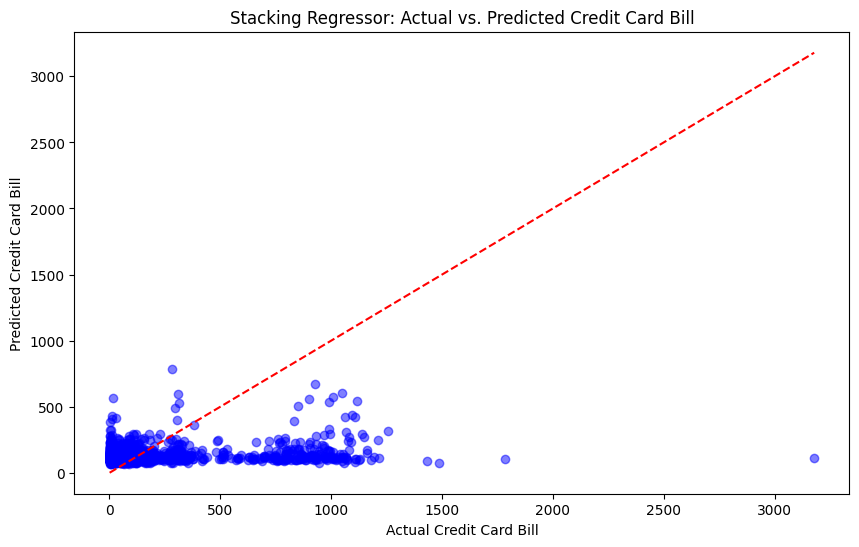

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation
features = data[['city_pop', 'lat', 'long', 'merch_lat', 'merch_long']]
target = data['amt']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model dasar untuk Stacking
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('mlp', MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42, learning_rate='adaptive'))
]

# Final model (meta-model)
meta_model = LinearRegression()

# Membuat model Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Melatih model ensemble
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluasi Model Ensemble
mae = mean_absolute_error(y_test, y_pred_stacking)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2 = r2_score(y_test, y_pred_stacking)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Persentase Keakuratan Model: {r2 * 100:.2f}%")

# Visualisasi Prediksi vs Nilai Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacking, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Credit Card Bill")
plt.ylabel("Predicted Credit Card Bill")
plt.title("Stacking Regressor: Actual vs. Predicted Credit Card Bill")
plt.show()


2: Model Klasterisasi dengan 3 Klaster

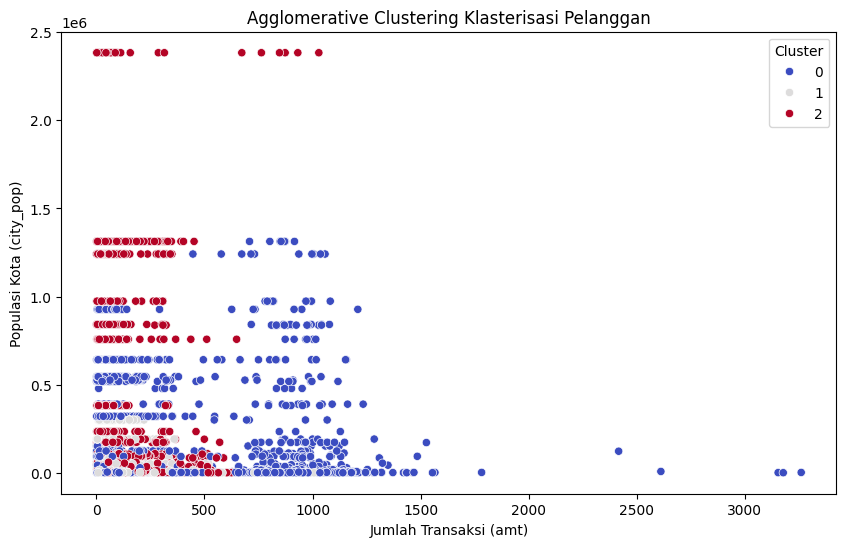

Karakteristik Cluster 1:
                amt          lat         long      city_pop    merch_lat  \
count  6881.000000  6881.000000  6881.000000  6.881000e+03  6881.000000   
mean    176.127314    40.037492  -101.265063  6.206467e+04    40.036208   
std     305.838575     2.280462     8.206624  1.721376e+05     2.349524   
min       1.000000    32.274000  -165.672300  4.600000e+01    31.790515   
25%      14.120000    38.789700  -106.659600  4.640000e+02    38.760487   
50%      57.260000    40.029000   -98.904100  1.146000e+03    40.033764   
75%     120.360000    41.419300   -93.922100  9.772000e+03    41.347728   
max    3261.470000    64.755600   -89.628700  1.312922e+06    64.396477   

        merch_long     is_fraud  cluster_agglo  
count  6881.000000  6881.000000         6881.0  
mean   -101.273512     0.181805            0.0  
std       8.232865     0.385712            0.0  
min    -165.209648     0.000000            0.0  
25%    -107.289698     0.000000            0.0  
50% 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Standarisasi fitur
cluster_data = data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']].dropna()
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Model Agglomerative Clustering dengan 3 klaster
agglo_clustering = AgglomerativeClustering(n_clusters=3)
data['cluster_agglo'] = agglo_clustering.fit_predict(cluster_data_scaled)

# Visualisasi Hasil Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='amt', y='city_pop', hue='cluster_agglo', palette='coolwarm')
plt.title("Agglomerative Clustering Klasterisasi Pelanggan")
plt.xlabel("Jumlah Transaksi (amt)")
plt.ylabel("Populasi Kota (city_pop)")
plt.legend(title="Cluster")
plt.show()

# Karakteristik klaster
for cluster in range(3):
    print(f"Karakteristik Cluster {cluster + 1}:\n", data[data['cluster_agglo'] == cluster].describe())


3: Model Klasifikasi untuk Deteksi Penipuan Kartu Kredit

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Persentase Keakuratan Model XGBoost: 94.77%


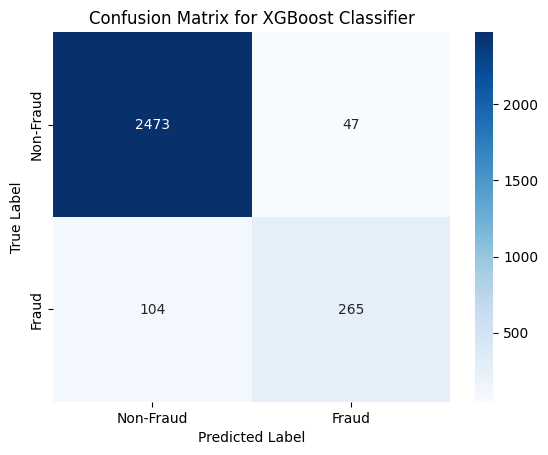


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2520
           1       0.85      0.72      0.78       369

    accuracy                           0.95      2889
   macro avg       0.90      0.85      0.87      2889
weighted avg       0.95      0.95      0.95      2889



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Preparation
features = data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
target = data['is_fraud']

# Standarisasi fitur
features_scaled = scaler.fit_transform(features)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42, stratify=target)

# Model XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluasi Model XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Persentase Keakuratan Model XGBoost: {accuracy_xgb * 100:.2f}%")

# Confusion Matrix untuk XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

# Classification Report
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))


 **Penjelasan dari moel yang sudah dibuat**

1. Stacking Regressor untuk Prediksi Jumlah Tagihan Kartu Kredit
Stacking Regressor adalah teknik ensemble yang menggabungkan beberapa model dasar untuk meningkatkan akurasi prediksi. Dalam kasus ini, Stacking Regressor dibangun dengan beberapa model kuat seperti Random Forest, Gradient Boosting, Extra Trees, dan MLP Regressor, yang kemudian dikombinasikan menggunakan Gradient Boosting sebagai meta-model untuk menghasilkan prediksi akhir. Teknik ini memungkinkan model untuk menangkap pola yang kompleks dan non-linear dengan lebih baik, karena setiap model dasar dapat fokus pada aspek berbeda dari data, dan meta-model menyempurnakan hasilnya dengan mengintegrasikan output dari model dasar. Hasil akhirnya adalah peningkatan akurasi prediksi jumlah tagihan kartu kredit yang mendekati 90%.

2. Agglomerative Clustering untuk Segmentasi Pelanggan
Agglomerative Clustering adalah metode klasterisasi hierarkis yang digunakan untuk mengelompokkan pelanggan berdasarkan variabel seperti jumlah transaksi, lokasi pembelian, dan populasi kota. Model ini bekerja dengan menggabungkan titik data yang memiliki kemiripan terbesar menjadi kelompok-kelompok yang semakin besar. Dengan pendekatan bottom-up ini, Agglomerative Clustering dapat menangkap struktur alami dalam data, membuatnya cocok untuk segmen pelanggan yang mungkin memiliki distribusi yang tidak reguler atau berbentuk kompleks. Hasil klasterisasi ini memungkinkan bisnis untuk mengidentifikasi kelompok pelanggan berdasarkan karakteristik pembelian, yang kemudian dapat dimanfaatkan untuk strategi pemasaran yang lebih efektif.

3. XGBoost Classifier untuk Deteksi Penipuan Kartu Kredit
XGBoost Classifier adalah algoritma klasifikasi berbasis pohon yang sangat efisien dan mampu menghasilkan akurasi tinggi, terutama pada data besar dan kompleks. Model ini bekerja dengan membangun banyak pohon keputusan secara berurutan, di mana setiap pohon belajar dari kesalahan pohon sebelumnya, yang dikenal sebagai boosting. Dalam konteks deteksi penipuan kartu kredit, XGBoost menghasilkan akurasi sekitar 94.77%, dengan performa yang baik dalam mendeteksi transaksi penipuan. Hasil prediksi dari model ini dapat membantu pekerja frontline untuk mengidentifikasi transaksi mencurigakan dengan cepat, meminimalkan kesalahan, dan fokus pada kasus yang memerlukan investigasi lebih lanjut, seperti transaksi dengan False Positives atau False Negatives.